# FORESEE Models: Dark Photon + Dark Higgs

## Load Libraries 

In [1]:
import sys, os
src_path = "../../"
sys.path.append(src_path)

import numpy as np
from src.foresee import Foresee, Utility, Model
from matplotlib import pyplot as plt 

## 1. Specifying the Model

Let us consider a model that consists of a dark photon $A'$ and a dark Higgs $\phi$ as introduced in [2008.12765](https://arxiv.org/abs/2008.12765). As usual, the dark photon $A′$ is a new massive vector boson that kinetically mixes with the SM photon, effectively introducing couplings of the dark photon to all charged SM fermions. The dark Higgs is a new scalar particle that mixes with the SM Higgs, thereby getting Higgs-like couplings to all SM particles. In addition, the dark Higgs generates the dark photon mass: similar to the case f he SM Z-boson, this leads to a coupling of the dark Higgs to a pair of dark photons propoertional to the dark photon mass. The phenomenology of the model can then be described by the following Lagrangian

\begin{equation}
 \mathcal{L} = - \frac{1}{2} \color{red}{m_{A'}}^2 A'^2 - \color{red}{\epsilon} e \sum \bar f \gamma^\mu f A'_\mu - \color{red}{m_{\phi}}^2 \phi^2 -  \sin\color{red}{\theta} \ \sum \ (m \ /\ v )\ \bar f \ f  \ \phi - \color{red}{g}  \color{red}{m_{A'}} \phi A' A'\ . 
\end{equation}

The free parameters of the model are marked in red. 

In the following, we are interested in the regime where $m_{\phi}>2 m_{A'}$ and sufficiently large $g$ such that $BR(\phi \to A' A') \approx 1$. In this case, the dark photon can be produced via $B \to X_s \phi$ with $ \phi \to A' A'$. The corresponding production rate is independent of both $g$, $\epsilon$ and $m_{A'}$, thereby providing an efficient production mechanism throughout the entire parameter space.

**Constraint on BR($B\to X_s A' A'$):** Belle2 has measured the BR$(B\to K + inv)= (2.3 \pm 0.8) \cdot 10^{-5}$, and therefore a few sigma above the SM expectation BR$(B\to K \nu\nu)= 5.6 \cdot 10^{-6}$ from a $K \nu \nu$ final state; see [2311.14647](https://arxiv.org/abs/2311.14647). We can use this to set a rough bound on $\theta$ by noting that  

\begin{equation}
BR_{B \rightarrow K\phi} \!=\!\frac{1}{\Gamma_B} \frac{\lambda_{B, K, \phi}^{1/2}}{64\pi\,m_B} \frac{(m_B^2-m_K^2)^2}{(m_b-m_s)^2}\!{f_{K}^2} \, |g_{\phi sb}|^2   \quad \text{with} \quad
  f_{K}\!=\! \frac{0.33}{1\!-\!m_\phi^2/37.5\text{GeV}^2}  \quad \text{and} \quad    g_{\phi sb}\!=\!\frac{s_\theta\,m_b}{v}\,\frac{3}{16\pi^2 v^2} \!\!\sum_{i=u,c,b}\!\! m_i^2\, V_{is}^* V_{ib} \!=\! 6.66\cdot 10^{-6}  \times s_\theta
\end{equation}

We get BR$(B\to K \phi) =  0.43 \times \theta^2$ for $m_{\phi}\lesssim 2$ GeV. From the measurement, we require BR$(B\to K \phi) < 3.8 \cdot 10^{-5}$ and therefore $\theta<0.009$. To explain the anomaly, we need BR$(B\to K \phi) \sim 1.8 \cdot 10^{-5}$ and therefore $\theta\sim 0.006$. In the following, we choose $\theta = 0.002$. 

**Invisible Higgs BR:** Using [2406.17760](https://arxiv.org/abs/2406.17760) Eq 27, the invisible branching fraction of the Higgs is

\begin{equation}
BR(h \to A' A') = \frac{1}{\Gamma_h}\frac{g \theta^2}{32 \pi} \frac{m_{h}^3}{m_{A'}^2}  = 5\cdot 10^{-10} \left(\frac{g}{10^{-4}}\right)^2 \left(\frac{\theta}{10^{-4}}\right)^2 \left(\frac{1 GeV}{m_{A'}}\right)^{-2}
\end{equation}

The BR($h \to \phi\phi$) is a factor 4 smaller. So unless we choose very large values of $g$, this is not a concern. 

In [2]:
energy = "13.6"
modelname="DarkPhoton+DarkHiggs"
model = Model(modelname, path="./")

**Standard Production:** As usual, the dark photon is produced in the decay of pseudoscalar mesons $\pi^0$, $\eta$ and $\eta' \to \gamma A'$. The branching fractions for the leading channels are 

\begin{equation}
    \text{BR}(\pi^0 \to A' \gamma) = 2 \epsilon^2 \times\text{BR}(\pi^0 \to \gamma\gamma) \times \left(1-m_{A'}^2/m_\pi^2\right)^3
    \quad\quad\text{and}\quad\quad
    \text{BR}(\eta \to A' \gamma) = 2 \epsilon^2 \times\text{BR}(\eta \to \gamma\gamma) \times \left(1-m_{A'}^2/m_\eta^2\right)^3
\end{equation}

In the following, we model the production using `EPOSLHC`, `SIBYLL` and `QGSJET`. 

In [3]:
model.add_production_2bodydecay(
    pid0 = "111",
    pid1 = "22",
    br = "2.*0.99 * coupling**2 * pow(1.-pow(mass/self.masses('pid0'),2),3)",
    generator = ['EPOSLHC', 'SIBYLL', 'QGSJET'],
    energy = energy,
    nsample = 1000,
)

In [4]:
model.add_production_2bodydecay(
    pid0 = "221",
    pid1 = "22",
    br = "2.*0.39 * coupling**2 * pow(1.-pow(mass/self.masses('pid0'),2),3)",
    generator = ['EPOSLHC', 'SIBYLL', 'QGSJET'],
    energy = energy,
    nsample = 1000, 
)

Dark photons can also be produced via dark Bremsstrahlung, so coherent radiation off a proton in processes such as $p p \to p p A'$. The spectra for LLPs have been exbtained following the description in [1708.09389](https://arxiv.org/abs/1708.09389) and are provided in the `files/direct` directory. As the FWW apprixmation loose validaty at high pT, we impose a cut on the pT of the dark photon and study the associated uncertainy by varing that cut as `0.5`, `1`, `2` GeV.


In [5]:
masses_brem = [ 
    0.01  ,  0.0126,  0.0158,  0.02  ,  0.0251,  0.0316,  0.0398,
    0.0501,  0.0631,  0.0794,  0.1   ,  0.1122,  0.1259,  0.1413,
    0.1585,  0.1778,  0.1995,  0.2239,  0.2512,  0.2818,  0.3162,
    0.3548,  0.3981,  0.4467,  0.5012,  0.5623,  0.6026,  0.631 ,
    0.6457,  0.6607,  0.6761,  0.6918,  0.7079,  0.7244,  0.7413,
    0.7586,  0.7762,  0.7943,  0.8128,  0.8318,  0.8511,  0.871 ,
    0.8913,  0.912 ,  0.9333,  0.955 ,  0.9772,  1.    ,  1.122 ,
    1.2589,  1.4125,  1.5849,  1.7783,  1.9953,  2.2387,  2.5119,
    2.8184,  3.1623,  3.9811,  5.0119,  6.3096,  7.9433, 10.    
]

model.add_production_direct(
    label = "Brem",
    energy = energy,
    condition = ["p.pt<1", "p.pt<2", "p.pt<0.5"],
    coupling_ref=1,
    masses = masses_brem,
)

**Production via Dark Higgs Decay:** In addition, the dark photon is produced via $B \to X_s A' A'$ decays via an intermediate on-shell dark Higgs. Assuming $BR(\phi \to A' A') \approx 1$ for simplicity, the branching fraction is 

\begin{equation}
    \text{BR}(b \to X_s\  A' A') = 5.6 \times (1-m_\phi^2/m_B^2)^2 \times \theta^2
\end{equation}

We can use `model.add_production_3bodydecay()` function with `integration = "chain_decay"` to model this. This requires the input `br = [branching ratio function, mass of the intermediate state]`, where we choose $m_{\phi} = 2$GeV and $\theta = 0.002$ as an example. We also specify the `massrange` and set `scaling = 0` to let FORESEE know that the branching ratio scales as $BR \sim coupling^0 \sim$ const. In the following, we model heavy hadron production using the `POWHEG+Pythia8` predicions. 

In [6]:
mass_DarkHiggs = 2
theta_DarkHiggs = 2e-3

In [7]:
model.add_production_3bodydecay(
    pid0 = "511",
    pid1 = "130",
    pid2 = "0",
    integration = "chain_decay",
    br = ["2*5.6 * "+str(theta_DarkHiggs)+"**2 * pow(1.-pow(mass/self.masses(511),2),2)",str(mass_DarkHiggs)],
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 2000,
    massrange = [0,mass_DarkHiggs/2],
    scaling = 0, 
)

model.add_production_3bodydecay(
    pid0 = "-511",
    pid1 = "130",
    pid2 = "0",
    integration = "chain_decay",
    br = ["2*5.6 * "+str(theta_DarkHiggs)+"**2 * pow(1.-pow(mass/self.masses(-511),2),2)",str(mass_DarkHiggs)],
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 2000,
    massrange = [0,mass_DarkHiggs/2],
    scaling = 0, 
)

model.add_production_3bodydecay(
    pid0 = "521",
    pid1 = "321",
    pid2 = "0",
    integration = "chain_decay",
    br = ["2*5.6 * "+str(theta_DarkHiggs)+"**2 * pow(1.-pow(mass/self.masses(521),2),2)",str(mass_DarkHiggs)],
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 2000,
    massrange = [0,mass_DarkHiggs/2],
    scaling = 0, 
)
model.add_production_3bodydecay(
    pid0 = "-521",
    pid1 = "-321",
    pid2 = "0",
    integration = "chain_decay",
    br = ["2*5.6 * "+str(theta_DarkHiggs)+"**2 * pow(1.-pow(mass/self.masses(-521),2),2)",str(mass_DarkHiggs)],
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 2000,
    massrange = [0,mass_DarkHiggs/2],
    scaling = 0, 
)

**Decay:** The decay widths and branching fraction of dark photon are the same as usual. 

In [8]:
model.set_ctau_1d(
    filename="model/ctau.txt", 
)

decay_modes = ["e_e", "mu_mu", "pi+_pi-", "pi0_gamma", "pi+_pi-_pi0", "K_K"] 
model.set_br_1d(
    modes = decay_modes,
    finalstates=[[11,-11], [13,-13], [211,-211], [111,22], None, [321,-321]],
    filenames=["model/br/"+mode+".txt" for mode in decay_modes],
)

We can now initiate FORESEE with the model that we just created. 

In [9]:
foresee = Foresee(path=src_path)
foresee.set_model(model=model)

## 2. Event Generation

In the following, we want to study one specific benchmark point with $m_{A'}=50$ MeV and $\epsilon=3\cdot 10^{-5}$ and export events as a HEPMC file. 

In [10]:
mass, coupling, = 0.2, 3e-6

First, we will produce the corresponding flux for this mass and a reference coupling $\epsilon_{ref}=1$. 

save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<1_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<2_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<0.5_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Max_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Min_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_0.2.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Max_m_0.2.npy
save data to file: 

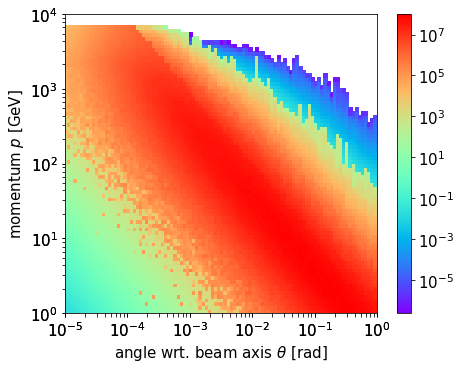

CPU times: user 29 s, sys: 8 s, total: 37 s
Wall time: 50.9 s


In [11]:
%%time

plot=foresee.get_llp_spectrum(mass=mass, coupling=1, do_plot=True)
plot.savefig("Spectrum_"+modelname+".pdf")
plot.show()

Next, let us define the configuration of the detector (in terms of position, size and luminosity). Here we choose FASER2 at the FPF. 

In [12]:
foresee.set_detector(
    distance=480, 
    selection="np.sqrt((x.x)**2 + (x.y)**2)<.1",    
    length=1.5, 
    luminosity=180, 
)

For our benchmark point, let us now look at how many particle decay inside the decay volume. We also export 1000 unweighted events as a HEPMC file. 

In [13]:
setupnames = ['central', 'max', 'min']
modes_original = {
    '111':  ['EPOSLHC', 'SIBYLL'    , 'QGSJET'    ], 
    '221':  ['EPOSLHC', 'SIBYLL'    , 'QGSJET'    ], 
    'Brem': ["p.pt<1" , "p.pt<2"    , "p.pt<0.5"  ],
}

modes_new = {
    '511':  ['NLO-P8' , 'NLO-P8-Max', 'NLO-P8-Min'],
    '-511': ['NLO-P8' , 'NLO-P8-Max', 'NLO-P8-Min'],
    '521':  ['NLO-P8' , 'NLO-P8-Max', 'NLO-P8-Min'],
    '-521': ['NLO-P8' , 'NLO-P8-Max', 'NLO-P8-Min'],
}

momenta_original, weights_original, _ = foresee.write_events(
    mass = mass, 
    coupling = coupling, 
    energy = energy, 
    numberevent = 1000,
    filename = "model/events/test.hepmc", 
    return_data = True,
    weightnames=setupnames,
    modes=modes_original,
)

momenta_new, weights_new, _ = foresee.write_events(
    mass = mass, 
    coupling = coupling, 
    energy = energy, 
    numberevent = 1000,
    filename = "model/events/test.hepmc", 
    return_data = True,
    weightnames=setupnames,
    modes=modes_new,
)

for isetup, setup in enumerate(setupnames):
    print("Expected number of events for "+setup+":", round(sum(weights_original[:,isetup]),3), round(sum(weights_new[:,isetup]),3))

Expected number of events for central: 0.971 32.066
Expected number of events for max: 1.14 49.409
Expected number of events for min: 0.489 23.465


Let us plot the resulting energy distribution

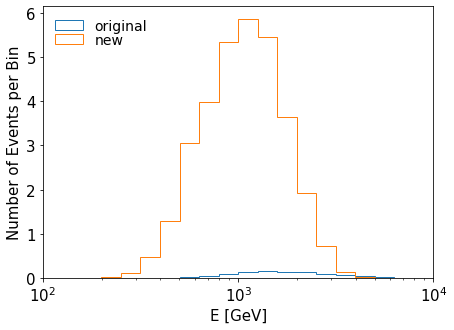

In [14]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
energies_original = [p.e for p in momenta_original] 
energies_new = [p.e for p in momenta_new]
bins=np.logspace(2,4, 20+1)
ax.hist(energies_original, weights=weights_original[:,0], bins=bins, histtype='step', label="original") 
ax.hist(energies_new     , weights=weights_new[:,0]     , bins=bins, histtype='step', label="new") 
ax.set_xscale("log")
ax.set_xlim(1e2,1e4) 
ax.set_xlabel("E [GeV]") 
ax.set_ylabel("Number of Events per Bin") 
ax.legend(frameon=False, labelspacing=0, fontsize=14, loc='upper left')
plt.savefig("E_distribution_"+modelname+".pdf")
plt.show()

## 3. Sensitivity Reach

In the following, we will obtain the projected sensitivity for the LLP model. For this, we first define a grid of couplings and masses, and then produce the corresponding fluxes. 

In [15]:
masses=[round(x,5) for x in np.logspace(-2,0.2,22+1)]
couplings = np.logspace(-9,-3,121) 

for mass in masses: foresee.get_llp_spectrum(mass=mass,coupling=1)

save data to file: ./model/LLP_spectra/13.6TeV_111_EPOSLHC_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_SIBYLL_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_QGSJET_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<1_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<2_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<0.5_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Max_m_0.01.npy
save data to 

save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.03162.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_0.03162.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_0.03162.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.03162.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Max_m_0.03162.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Min_m_0.03162.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_0.03162.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Max_m_0.03162.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Min_m_0.03162.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_0.03162.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Max_m_0.03162.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Min_m_0.03162.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_EPOSLHC_m_0.03981.npy
save data to file: ./mode

save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_EPOSLHC_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_SIBYLL_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_QGSJET_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<1_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<2_m_0.12589.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<0.5_

save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Max_m_0.39811.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Min_m_0.39811.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_0.39811.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Max_m_0.39811.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Min_m_0.39811.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.50119.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.50119.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.50119.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<1_m_0.50119.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<2_m_0.50119.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<0.5_m_0.50119.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.50119.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_0.50119.npy
save data to file: ./model/LLP_spec

Let us now scan over various masses and couplings, and record the resulting number of evets. Note that here we again consider the FASER configuration, which we set up before.

- only original channels

In [16]:
modes = {
    '111':  ['EPOSLHC', 'SIBYLL'    , 'QGSJET'    ], 
    '221':  ['EPOSLHC', 'SIBYLL'    , 'QGSJET'    ], 
    'Brem': ["p.pt<1" , "p.pt<2"    , "p.pt<0.5"  ],
}

#get reach  
list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
configuration='original'
for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

- only new channels

In [17]:
modes = {
    '511':  ['NLO-P8' , 'NLO-P8-Max', 'NLO-P8-Min'],
    '-511': ['NLO-P8' , 'NLO-P8-Max', 'NLO-P8-Min'],
    '521':  ['NLO-P8' , 'NLO-P8-Max', 'NLO-P8-Min'],
    '-521': ['NLO-P8' , 'NLO-P8-Max', 'NLO-P8-Min'],
}

#get reach  
list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
configuration='new'
for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

- all channels

In [18]:
modes = {
    '111':  ['EPOSLHC', 'SIBYLL'    , 'QGSJET'    ], 
    '221':  ['EPOSLHC', 'SIBYLL'    , 'QGSJET'    ], 
    'Brem': ["p.pt<1" , "p.pt<2"    , "p.pt<0.5"  ],
    '511':  ['NLO-P8' , 'NLO-P8-Max', 'NLO-P8-Min'],
    '-511': ['NLO-P8' , 'NLO-P8-Max', 'NLO-P8-Min'],
    '521':  ['NLO-P8' , 'NLO-P8-Max', 'NLO-P8-Min'],
    '-521': ['NLO-P8' , 'NLO-P8-Max', 'NLO-P8-Min'],
}

#get reach 
list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
configuration='all'
for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

We can now plot the results. For this, we first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [19]:
th = 2e-3

setups = [ 
    ["13.6TeV_original_central.npy", r"$\pi$, $\eta$, Brem", "salmon",  "solid" , 0., 3],
    ["13.6TeV_new_central.npy", r"$B\to X_s A' A'$", "deepskyblue",  "solid" , 0., 3*(2e-3/th)**2],
]

Then we specify all the existing bounds, separating the bounds obtained by experimental collaborations and theory recasts.

In [20]:
bounds2 = [ 
    ["bounds_E137.txt",  "E137",  0.015, 9.00e-8, 0  ],
    ["bounds_NuCal.txt", "NuCal", 0.101, 3.00e-6, -20],
    ["bounds_CHARM.txt", "CHARM", 0.101, 1.0e-6, -20 ],
    ["bounds_Orsay.txt", "Orsay", 3.8e-2, 2.0e-6, 0],
    ["bounds_E141.txt",  "E141",  0.021, 1.0e-4, 0 ],
]
bounds = [ 
    ["bounds_NA62mumu.txt", r"NA62 - $\mu\mu$", 0.220, 7.0e-7, 0],    
    ["bounds_FASER-27invfb.txt", "FASER", 3.5e-2, 1.8e-5, -30],    
    ["bounds_NA48.txt",  "NA48",  0.015, 1.20e-3, 0  ],
    ["bounds_LHCb1.txt", "LHCb",  0.220, 7.00e-5, 0  ],
    ["bounds_LHCb2.txt",  None  , 0    , 0      , 0  ],
    ["bounds_LHCb3.txt",  None  , 0    , 0      , 0  ],
    ["bounds_NA64.txt",  "NA64",  0.015, 2.40e-4, -30],
    ["bounds_BaBar.txt", "BaBar", 0.320, 1.20e-3, 0  ],
    ["bounds_A1.txt",    "A1",    0.100, 1.20e-3, 0  ],
    ["bounds_KLOE.txt",  "KLOE",  0.620, 1.40e-3, 0  ],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [21]:
projections = [
    ["limits_SeaQuest.txt",       "teal",     "SeaQuest", 0.300, 5.0e-6, -30  ],
    ["limits_NA62.txt",           "dodgerblue",   "NA62"    , 0.131, 4.5e-6, -20  ],
    ["limits_SHiP.txt",           "cyan",         "SHiP"    , 0.150, 1.4e-5, -30  ],
    ["limits_HPS-prompt.txt",     "deepskyblue",  "HPS"     , 0.050, 1.4*10**-4, 0  ],
    ["limits_HPS-displaced.txt",  "deepskyblue",  None      , 0.050, 1.4*10**-4, 0  ],
    ["limits_Belle2.txt",         "blue",         "Belle2"  , 0.050, 2.4*10**-4, 0  ],
    ["limits_LHCb.txt",           "dodgerblue",   "LHCb"    , 0.135, 2.8*10**-4, 0  ],
    ["limits_LHCb-mumu1.txt",     "dodgerblue",   None      , 0    , 0         , 0  ],
    ["limits_LHCb-mumu2.txt",     "dodgerblue",   None      , 0    , 0         , 0  ],
]

We also want to show the branching fractions for some of the channels (name of file in model/br directory, color, line style, label, x-position, y-position)  

In [22]:
branchings = [
    ["e_e"         , "red"          , "solid" , r"ee"               , 0.050, 0.60],
    ["mu_mu"       , "orange"       , "solid" , r"$\mu\mu$"         , 0.170, 0.10],
    ["pi+_pi-"     , "blue"         , "solid" , r"$\pi^+\pi^-$"     , 0.225, 0.05],
    ["pi0_gamma"   , "dodgerblue"   , "solid" , r"$\pi^0\gamma$"    , 0.580, 0.02],
    ["pi+_pi-_pi0" , "cyan"         , "solid" , r"$\pi^0\pi^+\pi^-$", 0.389, 0.05],
    ["K_K"         , "green"        , "solid" , r"$KK$"             , 1.150, 0.105], 
]

Finally, we can plot everything using `foresee.plot_reach()`. Here we also add the dark matter relict target line obtained in [2105.07077](https://arxiv.org/abs/2105.07077).

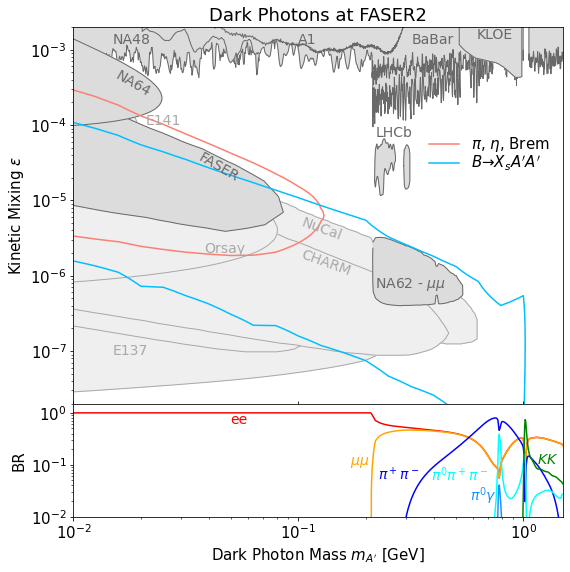

In [23]:
plot, ax, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    bounds2=bounds2,
    projections=[],
    branchings=branchings,
    title="Dark Photons at FASER2", 
    xlims = [0.01,1.5], 
    ylims=[2e-8,0.002],
    xlabel=r"Dark Photon Mass $m_{A'}$ [GeV]", 
    ylabel=r"Kinetic Mixing $\epsilon$",
    legendloc=(1,0.75),
    figsize=(8,8),
)

plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
plot.savefig("Reach_"+modelname+".pdf")
plot.show()